In [ ]:
!pip install pandas numpy scikit-learn openpyxl joblib

# **1. Import Libraries:**

In [ ]:
import pandas as pd
import numpy as np
train=pd.read_csv('/content/tested.csv')
test=pd.read_csv('/content/tested.csv')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# **2. Load Excel Data:**

In [ ]:
df = pd.read_csv('/content/tested.csv')  # Path to the file in Colab

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# **3. Exploring Data**

In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
#importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style='whitegrid')

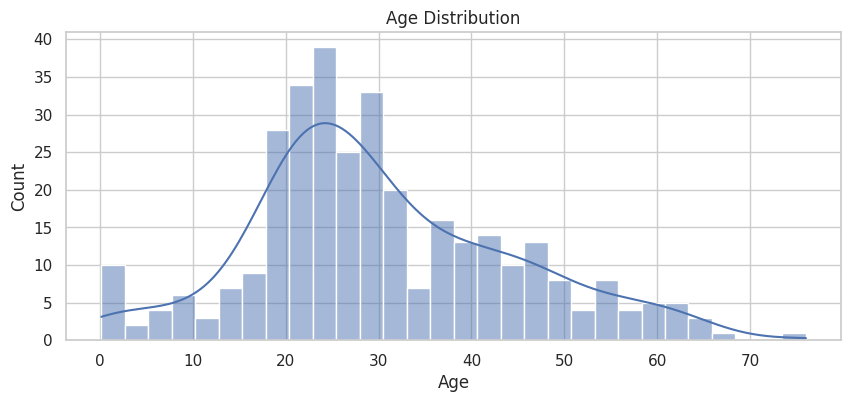

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['Age'],bins=30,kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

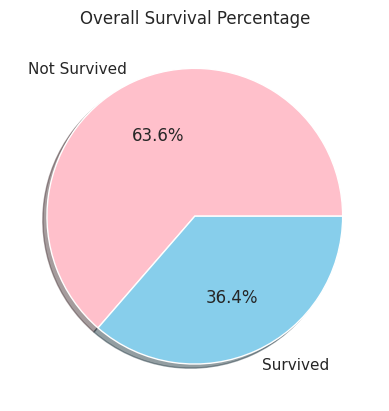

In [ ]:
train["Survived"].value_counts().plot.pie(autopct="%1.1f%%", labels=["Not Survived", "Survived"], colors=["pink", "skyblue"],shadow=True)
plt.title("Overall Survival Percentage")
plt.ylabel("")  # Remove y-label for aesthetics
plt.show()

**Inference: Approximately 38% passengers survived, while 62% did not, showing that more than half of the passengers perished in the Titanic disaster**

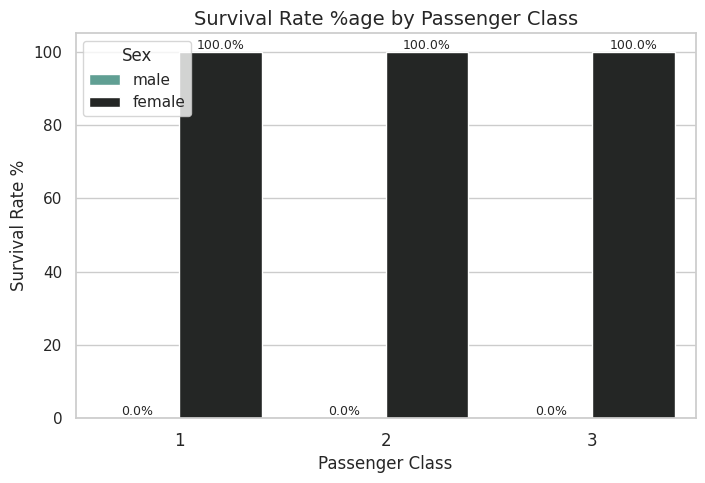

In [ ]:
# Bar Plot: Survival Rate by Class
plt.figure(figsize=(8, 5))
ax=sns.barplot(x=train["Pclass"], y=train["Survived"]*100,hue=train['Sex'],ci=None,palette="dark:#5A9_r")
# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", fontsize=9)  # Format as percentage
plt.xlabel("Passenger Class",fontsize=12)
plt.ylabel("Survival Rate %",fontsize=12)
plt.title("Survival Rate %age by Passenger Class",fontsize=14)
plt.xticks(fontsize=12)
plt.show()

**Inference: Passengers in 1st class especially female, had a significantly higher survival rate compared to those in 2nd and 3rd class, indicating that passenger class influenced survival chances.**

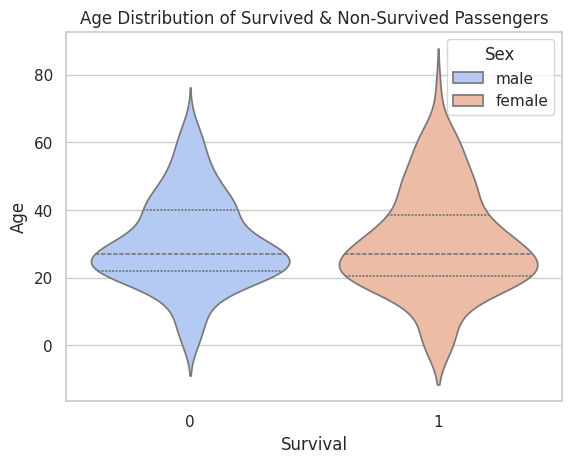

In [ ]:
# Violin Plot: Age Distribution among Survived & Not Survived
sns.violinplot(x="Survived", y="Age", hue="Sex",data=train, palette="coolwarm", inner="quartile")
plt.title("Age Distribution of Survived & Non-Survived Passengers")
plt.xlabel('Survival')
plt.show()

**Inference: Survivors were often younger and adults,especially among children, reflecting the "women and children first" policy during evacuation.**

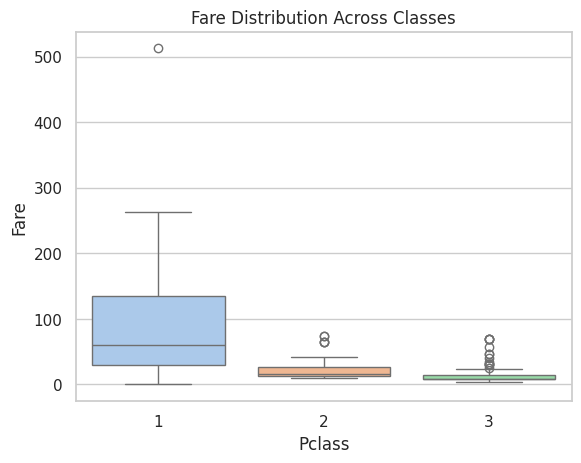

In [ ]:
# Box Plot: Fare Distribution Across Passenger Classes
sns.boxplot(x="Pclass", y="Fare", data=train, palette="pastel")
plt.title("Fare Distribution Across Classes")
plt.show()

**Inference: Higher-class passengers paid more fare. The fare distribution increases significantly from 3rd to 1st class, indicating a clear economic divide on board.**

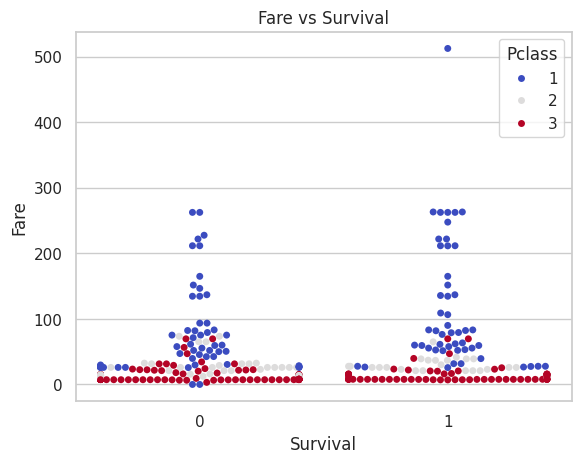

In [ ]:
# Swarm Plot: Fare vs Survival
sns.swarmplot(x="Survived", y="Fare",hue="Pclass",data=train, palette="coolwarm")
plt.title("Fare vs Survival")
plt.xlabel('Survival')
plt.show()

**Inference: Passengers who paid higher fares tended to survive more, again reflecting that first-class (high fare) passengers were prioritized.**

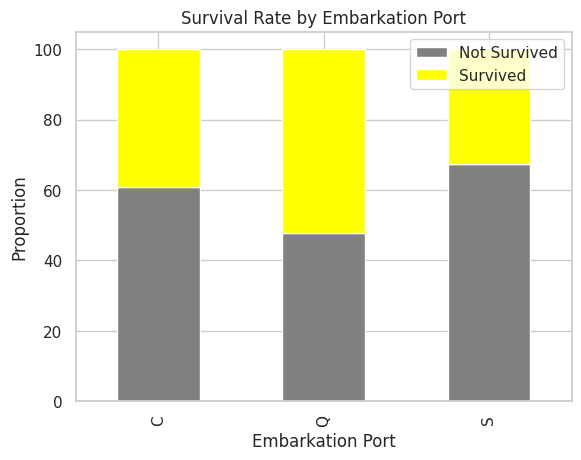

In [ ]:
# Stacked Bar Chart: Survival by Embarkation
embarked_survival = train.groupby("Embarked")["Survived"].value_counts(normalize=True).unstack()*100
embarked_survival.plot(kind="bar", stacked=True, color=["grey", "yellow"])
plt.xlabel("Embarkation Port")
plt.ylabel("Proportion")
plt.title("Survival Rate by Embarkation Port")
plt.legend(["Not Survived", "Survived"])
plt.show()

**Inference: Passengers embarking from Cherbourg (C) had the highest survival rate, and then Queenstown (Q) had the less. This may relate to class distribution by port.**

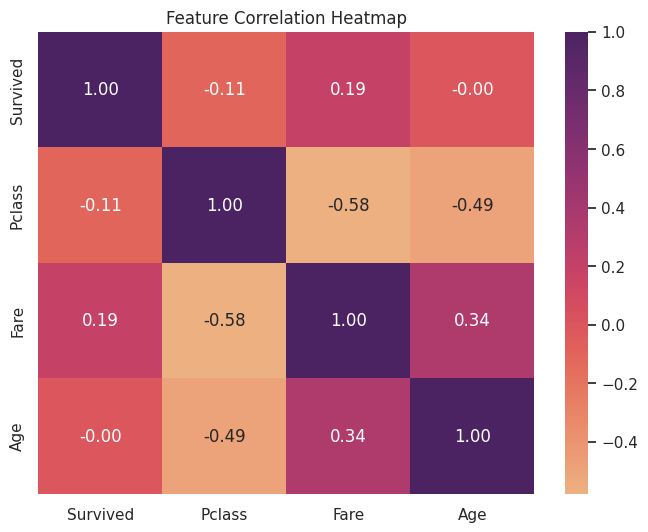

In [ ]:
# Heatmap: Correlation of Survival with Other Features
plt.figure(figsize=(8,6))
sns.heatmap(train[["Survived", "Pclass", "Fare","Age"]].corr(), annot=True, cmap="flare", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

**Inference: Fare and Pclass have a strong negative correlation. Fare has a positive correlation with survival, while Pclass is negatively correlated, reinforcing earlier observations.**

# **4. Data Preprocessing**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# handling missing values
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
#df['Cabin'].fillna('U',inplace=True)

In [ ]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2


# **5. Feature Selection**

In [ ]:
features=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x=df[features]
y=df['Survived']

# **6. Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# spliting the data into training and tetsing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# model training
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
X = df.drop('target_column', axis=1)  # Where 'target_column' is the column you want to predict

KeyError: "['target_column'] not found in axis"

In [ ]:
# predictions
y_pred=model.predict(x_test)

# **7. Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
# Accuracy score
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)

Accuracy: 1.0


In [ ]:
# Classification report
report=classification_report(y_test,y_pred)
print('Classification_report:',report)

Classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [ ]:
# Confusion matrix
confusion=confusion_matrix(y_test,y_pred)
print('Confusion_matrix:',confusion)

Confusion_matrix: [[50  0]
 [ 0 34]]


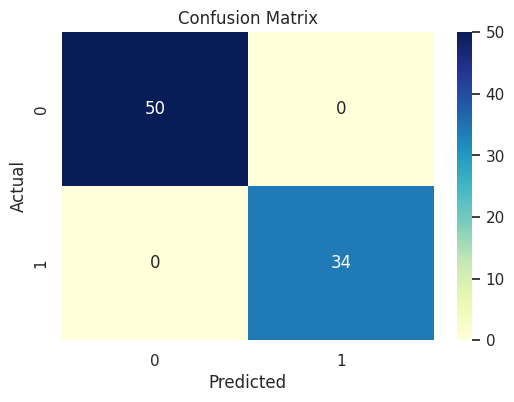

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

#plotting confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion,annot=True,fmt='d',cmap='YlGnBu')#,xticklabel=['Not survivred','Survived'],yticklabels=['Not Survived','Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()